In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [85]:
df = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/2023.csv")

In [86]:
df['runs_scored_play'] = df['post_bat_score'] - df['bat_score']

In [87]:
df['runner_1b'] = df['on_1b'].notna().astype(int)
df['runner_2b'] = df['on_2b'].notna().astype(int)
df['runner_3b'] = df['on_3b'].notna().astype(int)
df['runners'] = df['runner_1b'].astype(str) + df['runner_2b'].astype(str) + df['runner_3b'].astype(str)
df['half_inning'] = df['game_pk'].astype(str) + ' ' + df['inning'].astype(str) + ' ' + df['inning_topbot'].astype(str)
df.head(2)

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,runs_scored_play,runner_1b,runner_2b,runner_3b,runners,half_inning
0,0,FF,2023-06-26,96.6,1.30,5.46,"Pérez, Cionel",663697,672335,field_out,hit_into_play,NaN,NaN,NaN,NaN,4.0,Jonathan India lines out sharply to pitcher Ci...,R,R,L,BAL,CIN,X,1.0,line_drive,0,0,2023,0.40,1.15,-0.40,2.36,NaN,592200.0,680574.0,2,9,Top,126.28,178.18,NaN,NaN,668939,NaN,NaN,-5.414069,-140.683404,-5.349516,6.462568,29.817046,-15.906431,3.25,1.49,85.0,104.5,3.0,96.6,1935.0,6.1,717611,672335,668939,623993,676059,602104,622761,663630,656775,543305,54.41,0.54,0.494,0.0,1.0,0.0,0.0,4.0,82,1,4-Seam Fastball,10,3,3,10,3,10,3,10,Standard,Standard,143.0,0.0,-0.470,0,1,1,0,110,717611 9 Top
1,1,SL,2023-06-26,84.0,1.13,5.41,"Pérez, Cionel",680574,672335,hit_by_pitch,hit_by_pitch,NaN,NaN,NaN,NaN,13.0,Matt McLain hit by pitch. Curt Casali to 2nd.,R,R,L,BAL,CIN,B,NaN,NaN,0,1,2023,-0.97,-0.76,-1.95,0.66,NaN,NaN,592200.0,2,9,Top,NaN,NaN,NaN,NaN,668939,NaN,NaN,-5.182541,-122.154006,-3.033489,-8.572826,25.614770,-39.361003,3.02,1.35,NaN,NaN,NaN,83.2,2643.0,5.9,717611,672335,668939,623993,676059,602104,622761,663630,656775,543305,54.58,NaN,NaN,0.7,1.0,0.0,0.0,NaN,81,2,Slider,10,3,3,10,3,10,3,10,Strategic,Standard,337.0,0.0,0.268,0,1,0,0,100,717611 9 Top


In [88]:
runs_scored = df.groupby('half_inning', as_index=False)[['bat_score', 'post_bat_score']].agg(['min', 'max'])
runs_scored.columns = runs_scored.columns.map('_'.join)

In [89]:
runs_scored

,bat_score_min,bat_score_max,post_bat_score_min,post_bat_score_max
half_inning,,,,
717137 1 Bot,0,0,0,0
717137 1 Top,0,0,0,0
717137 2 Bot,0,1,0,1
717137 2 Top,0,0,0,0
717137 3 Bot,1,2,1,2
...,...,...,...,...
718782 7 Top,8,10,8,10
718782 8 Bot,4,7,4,7
718782 8 Top,10,10,10,10


In [90]:
runs_scored['runs_scored_inning_total'] = runs_scored['post_bat_score_max'] - runs_scored['bat_score_min']

In [91]:
runs_scored_inning_total = runs_scored[['bat_score_min', 'runs_scored_inning_total']].reset_index()
runs_scored_inning_total

,half_inning,bat_score_min,runs_scored_inning_total
0,717137 1 Bot,0,0
1,717137 1 Top,0,0
2,717137 2 Bot,0,1
3,717137 2 Top,0,0
4,717137 3 Bot,1,1
...,...,...,...
29116,718782 7 Top,8,2
29117,718782 8 Bot,4,3
29118,718782 8 Top,10,0
29119,718782 9 Bot,7,2


In [92]:
df1 = pd.merge(df, runs_scored_inning_total, on='half_inning', how='left')
df1.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,runs_scored_play,runner_1b,runner_2b,runner_3b,runners,half_inning,bat_score_min,runs_scored_inning_total
0,0,FF,2023-06-26,96.6,1.30,5.46,"Pérez, Cionel",663697,672335,field_out,hit_into_play,NaN,NaN,NaN,NaN,4.0,Jonathan India lines out sharply to pitcher Ci...,R,R,L,BAL,CIN,X,1.0,line_drive,0,0,2023,0.40,1.15,-0.40,2.36,NaN,592200.0,680574.0,2,9,Top,126.28,178.18,NaN,NaN,668939,NaN,NaN,-5.414069,-140.683404,-5.349516,6.462568,29.817046,-15.906431,3.25,1.49,85.0,104.5,3.0,96.6,1935.0,6.1,717611,672335,668939,623993,676059,602104,622761,663630,656775,543305,54.41,0.540,0.494,0.0,1.0,0.0,0.0,4.0,82,1,4-Seam Fastball,10,3,3,10,3,10,3,10,Standard,Standard,143.0,0.000,-0.470,0,1,1,0,110,717611 9 Top,3,0
1,1,SL,2023-06-26,84.0,1.13,5.41,"Pérez, Cionel",680574,672335,hit_by_pitch,hit_by_pitch,NaN,NaN,NaN,NaN,13.0,Matt McLain hit by pitch. Curt Casali to 2nd.,R,R,L,BAL,CIN,B,NaN,NaN,0,1,2023,-0.97,-0.76,-1.95,0.66,NaN,NaN,592200.0,2,9,Top,NaN,NaN,NaN,NaN,668939,NaN,NaN,-5.182541,-122.154006,-3.033489,-8.572826,25.614770,-39.361003,3.02,1.35,NaN,NaN,NaN,83.2,2643.0,5.9,717611,672335,668939,623993,676059,602104,622761,663630,656775,543305,54.58,NaN,NaN,0.7,1.0,0.0,0.0,NaN,81,2,Slider,10,3,3,10,3,10,3,10,Strategic,Standard,337.0,0.000,0.268,0,1,0,0,100,717611 9 Top,3,0
2,2,FF,2023-06-26,98.1,1.02,5.43,"Pérez, Cionel",680574,672335,NaN,called_strike,NaN,NaN,NaN,NaN,13.0,Matt McLain hit by pitch. Curt Casali to 2nd.,R,R,L,BAL,CIN,S,NaN,NaN,0,0,2023,0.72,1.27,-0.90,1.88,NaN,NaN,592200.0,2,9,Top,NaN,NaN,NaN,NaN,668939,NaN,NaN,-6.836861,-142.596609,-7.064661,11.410048,30.779176,-13.343969,3.16,1.47,NaN,NaN,NaN,98.2,2281.0,6.3,717611,672335,668939,623993,676059,602104,622761,663630,656775,543305,54.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81,1,4-Seam Fastball,10,3,3,10,3,10,3,10,Standard,Standard,135.0,0.000,-0.036,0,1,0,0,100,717611 9 Top,3,0
3,3,FF,2023-06-26,97.2,1.12,5.42,"Pérez, Cionel",621028,672335,field_out,hit_into_play,NaN,NaN,NaN,NaN,11.0,Kevin Newman flies out to right fielder Aaron ...,R,R,L,BAL,CIN,X,9.0,fly_ball,0,0,2023,0.58,1.12,-0.19,3.53,NaN,NaN,592200.0,1,9,Top,199.45,125.37,NaN,NaN,668939,NaN,NaN,-4.851094,-141.638405,-2.165277,8.888789,29.957749,-16.719919,2.98,1.46,258.0,83.9,49.0,97.4,2118.0,6.2,717611,672335,668939,623993,676059,602104,622761,663630,656775,543305,54.31,0.009,0.008,0.0,1.0,0.0,0.0,3.0,80,1,4-Seam Fastball,10,3,3,10,3,10,3,10,Strategic,Standard,146.0,0.001,-0.305,0,1,0,0,100,717611 9 Top,3,0
4,4,FF,2023-06-26,98.2,1.17,5.40,"Pérez, Cionel",592200,672335,walk,ball,NaN,NaN,NaN,NaN,12.0,Curt Casali walks.,R,R,L,BAL,CIN,B,NaN,NaN,3,2,2023,0.54,1.10,1.05,3.11,NaN,NaN,NaN,1,9,Top,NaN,NaN,NaN,NaN,668939,NaN,NaN,-1.581448,-143.106085,-3.276620,7.775237,32.259300,-16.495157,3.40,1.62,NaN,NaN,NaN,98.1,2009.0,6.1,717611,672335,668939,623993,676059,602104,622761,663630,656775,543305,54.42,NaN,NaN,0.7,1.0,0.0,0.0,NaN,79,8,4-Seam Fastball,10,3,3,10,3,10,3,10,Standard,Standard,138.0,-0.001,0.227,0,0,0

In [93]:
df1['runs_scored_rest_of_inning'] = df1['runs_scored_inning_total'] - (df1['bat_score'] - df1['bat_score_min'])

In [94]:
re_24 = df1.groupby(['outs_when_up', 'runners'])['runs_scored_rest_of_inning'].mean().round(2).reset_index().rename(columns={'runs_scored_rest_of_inning': 're24'})

In [95]:
re_24

,outs_when_up,runners,re24
0,0,000,0.51
1,0,001,1.43
2,0,010,1.12
3,0,011,1.88
4,0,100,0.88
5,0,101,1.80
6,0,110,1.43
7,0,111,2.14
8,1,000,0.27
9,1,001,0.91


In [96]:
df2 = pd.merge(df1, re_24, on=['outs_when_up', 'runners'], how='left')

In [97]:
df2.sort_values(by=['game_pk', 'at_bat_number', 'pitch_number'], ascending=True, inplace=True)
df2.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,runs_scored_play,runner_1b,runner_2b,runner_3b,runners,half_inning,bat_score_min,runs_scored_inning_total,runs_scored_rest_of_inning,re24
457667,457667,FF,2023-08-03,92.0,1.65,6.06,"Urías, Julio",681146,628711,NaN,ball,NaN,NaN,NaN,NaN,12.0,Jonah Bride flies out sharply to left fielder ...,R,R,L,LAD,OAK,B,NaN,NaN,0,0,2023,0.35,1.43,0.14,3.74,NaN,NaN,NaN,0,1,Top,NaN,NaN,NaN,NaN,605131,NaN,NaN,-4.550254,-134.007699,-3.144669,5.174699,27.825792,-14.399557,3.13,1.45,NaN,NaN,NaN,91.1,2573.0,5.6,717137,628711,605131,518692,642708,571970,500743,621035,571771,605141,54.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,4-Seam Fastball,0,0,0,0,0,0,0,0,Standard,Standard,148.0,0.000,0.037,0,0,0,0,000,717137 1 Top,0,0,0,0.51
457666,457666,FF,2023-08-03,90.4,1.71,5.96,"Urías, Julio",681146,628711,NaN,ball,NaN,NaN,NaN,NaN,13.0,Jonah Bride flies out sharply to left fielder ...,R,R,L,LAD,OAK,B,NaN,NaN,1,0,2023,0.29,1.43,-1.08,1.76,NaN,NaN,NaN,0,1,Top,NaN,NaN,NaN,NaN,605131,NaN,NaN,-7.534464,-131.361801,-7.586403,4.829781,24.223570,-14.240257,3.13,1.45,NaN,NaN,NaN,90.2,2508.0,5.9,717137,628711,605131,518692,642708,571970,500743,621035,571771,605141,54.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,4-Seam Fastball,0,0,0,0,0,0,0,0,Standard,Standard,148.0,0.000,0.062,0,0,0,0,000,717137 1 Top,0,0,0,0.51
457665,457665,FF,2023-08-03,91.9,1.73,5.98,"Urías, Julio",681146,628711,field_out,hit_into_play,NaN,NaN,NaN,NaN,2.0,Jonah Bride flies out sharply to left fielder ...,R,R,L,LAD,OAK,X,7.0,fly_ball,2,0,2023,0.43,1.60,0.10,2.65,NaN,NaN,NaN,0,1,Top,76.11,111.65,NaN,NaN,605131,NaN,NaN,-4.998923,-133.648887,-6.022307,6.206207,27.704417,-11.881841,3.13,1.45,250.0,102.8,55.0,91.1,2521.0,5.8,717137,628711,605131,518692,642708,571970,500743,621035,571771,605141,54.73,0.011,0.014,0.0,1.0,0.0,0.0,3.0,1,3,4-Seam Fastball,0,0,0,0,0,0,0,0,Standard,Standard,153.0,0.022,-0.336,0,0,0,0,000,717137 1 Top,0,0,0,0.51
457664,457664,SV,2023-08-03,76.3,1.81,5.99,"Urías, Julio",680869,628711,NaN,ball,NaN,NaN,NaN,NaN,14.0,Zack Gelof singles on a ground ball to left fi...,R,R,L,LAD,OAK,B,NaN,NaN,0,0,2023,-1.59,-0.53,1.09,1.60,NaN,NaN,NaN,1,1,Top,NaN,NaN,NaN,NaN,605131,NaN,NaN,1.300727,-111.085403,-1.180189,-13.278424,22.118985,-36.506413,3.38,1.55,NaN,NaN,NaN,75.1,2892.0,5.6,717137,628711,605131,518692,642708,571970,500743,621035,571771,605141,54.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,Slurve,0,0,0,0,0,0,0,0,Standard,Standard,309.0,0.000,0.026,0,0,0,0,000,717137 1 Top,0,0,0,0.27
457663,457663,FF,2023-08-03,91.2,1.64,6.07,"Urías, Julio",680869,628711,single,hit_into_play,NaN,NaN,NaN,NaN,2.0,Zack Gelof singles on a ground ball to left fi...,R,R,L,LAD,OAK,X,7.0,ground_ball,1,0,2023,0.28,1.48,0.00,3.46,NaN,NaN,NaN,1,1,Top,87.09,103.27,NaN,NaN,605131,NaN,NaN,-4.639676,-132.765199,-3.815344,4.269216,27.584695,-14.076798,3.38,1.55,65.0,92.0,2.0,89.8,2551.0,5.4,717137,628711,605131,518692,642708,571970,500743,621035,571771,605141,55.15,0.426,0.404,0.9,1.0,1.0,0.0,2.0,2,2,4-Seam Fastball,0,0,

In [98]:
df2.groupby('events')['re24'].agg(['mean', 'min', 'max', 'std'])

,mean,min,max,std
events,,,,
catcher_interf,0.544412,0.10,1.88,0.362044
caught_stealing_2b,0.252446,0.23,0.52,0.077055
caught_stealing_3b,0.330000,0.30,0.45,0.067082
caught_stealing_home,0.520000,0.52,0.52,0.000000
double,0.503127,0.10,2.14,0.357565
double_play,0.943011,0.53,2.14,0.387348
field_error,0.428852,0.10,1.88,0.280002
field_out,0.439108,0.10,2.14,0.295584
fielders_choice,0.981680,0.23,2.14,0.399839


In [99]:
df2['re24_change'] = df2.groupby('half_inning').re24.diff().shift(-1)
df2['re24_change'] = df2['re24_change'] + df2['runs_scored_play']

In [100]:
df2.loc[df2['woba_denom'] == 1].groupby('events')['re24_change'].mean().round(2)

events
catcher_interf               0.36
double                       0.76
double_play                 -1.00
field_error                  0.41
field_out                   -0.25
fielders_choice              0.68
fielders_choice_out         -0.66
force_out                   -0.30
grounded_into_double_play   -0.84
hit_by_pitch                 0.33
home_run                     1.39
sac_fly                     -0.00
sac_fly_double_play         -0.73
single                       0.46
strikeout                   -0.29
strikeout_double_play       -0.78
triple                       1.06
triple_play                   NaN
walk                         0.31
Name: re24_change, dtype: float64

In [101]:
df2['re24_weight'] = df2.loc[df2['woba_denom'] == 1].groupby('events')['re24_change'].transform('mean').round(2)

In [102]:
df2.loc[df2['events'] == 'home_run'].head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,runs_scored_play,runner_1b,runner_2b,runner_3b,runners,half_inning,bat_score_min,runs_scored_inning_total,runs_scored_rest_of_inning,re24,re24_change,re24_weight
457493,457493,FF,2023-08-03,97.6,-1.13,5.55,"Sheehan, Emmet",680869,686218,home_run,hit_into_play,NaN,NaN,NaN,NaN,1.0,Zack Gelof homers (5) on a fly ball to left fi...,R,R,R,LAD,OAK,X,NaN,fly_ball,2,2,2023,-0.82,1.23,-0.57,3.25,NaN,NaN,NaN,1,6,Top,18.47,96.98,NaN,NaN,605131,NaN,NaN,3.415595,-142.104655,-3.518570,-11.930387,34.096268,-14.884094,3.38,1.55,364.0,102.6,26.0,97.7,2370.0,6.4,717137,686218,605131,518692,642708,571970,500743,621035,571771,605141,54.10,0.831,1.520,2.0,1.0,0.0,3.0,6.0,46,5,4-Seam Fastball,2,0,0,2,1,2,1,2,Strategic,Standard,214.0,-0.116,1.022,1,0,0,0,000,717137 6 Top,0,1,1,0.27,1.00,1.39
457439,457439,FF,2023-08-03,96.0,-1.13,5.54,"Sheehan, Emmet",691016,686218,home_run,hit_into_play,NaN,NaN,NaN,NaN,6.0,Tyler Soderstrom homers (1) on a fly ball to r...,R,L,R,LAD,OAK,X,NaN,fly_ball,2,2,2023,-0.85,1.47,0.76,2.73,NaN,NaN,NaN,1,8,Top,197.98,47.07,NaN,NaN,605131,NaN,NaN,6.928180,-139.523870,-5.161341,-12.710518,31.927407,-11.985659,3.48,1.56,414.0,103.0,27.0,96.1,2356.0,6.5,717137,686218,605131,518692,642708,621035,500743,444482,571771,605141,54.04,0.849,1.612,2.0,1.0,0.0,3.0,6.0,64,5,4-Seam Fastball,6,1,1,6,2,6,2,6,Strategic,Standard,216.0,-0.011,1.022,1,0,0,0,000,717137 8 Top,1,1,1,0.27,1.00,1.39
457431,457431,CH,2023-08-03,81.9,-2.30,5.51,"Neal, Zach",518692,594943,home_run,hit_into_play,NaN,NaN,NaN,NaN,5.0,Freddie Freeman homers (22) on a fly ball to r...,R,L,R,LAD,OAK,X,NaN,fly_ball,0,0,2023,-1.27,0.57,-0.21,2.50,NaN,NaN,NaN,0,8,Bot,240.94,72.99,NaN,NaN,669127,NaN,NaN,7.186301,-119.097804,-1.345031,-13.499191,22.077858,-26.703380,3.63,1.83,371.0,103.7,28.0,82.1,1645.0,6.4,717137,594943,669127,691016,680869,672478,649557,667670,668709,657656,54.11,0.854,1.720,2.0,1.0,0.0,3.0,6.0,67,1,Changeup,6,2,6,2,2,7,7,2,Standard,Standard,235.0,0.007,1.000,1,0,0,0,000,717137 8 Bot,6,2,2,0.51,1.00,1.39
457365,457365,FF,2023-08-03,94.1,-1.42,5.62,"Javier, Cristian",519317,664299,home_run,hit_into_play,NaN,NaN,NaN,NaN,4.0,Giancarlo Stanton homers (16) on a fly ball to...,R,R,R,NYY,HOU,X,NaN,fly_ball,3,2,2023,-0.36,1.42,-0.45,2.70,NaN,NaN,592450.0,2,1,Bot,62.16,36.48,NaN,NaN,455117,NaN,NaN,3.316541,-136.984643,-4.998437,-5.342528,32.472172,-13.442099,3.66,1.79,430.0,114.1,29.0,93.7,2231.0,6.2,717142,664299,455117,547989,514888,608324,665161,676801,676694,663656,54.28,0.994,2.014,2.0,1.0,0.0,3.0,6.0,8,6,4-Seam Fastball,0,0,0,0,0,2,2,0,Standard,Standard,203.0,0.191,1.851,2,1,0,0,100,717142 1 Bot,0,3,3,0.23,1.87,1.39
457361,457361,FF,2023-08-03,93.2,-1.62,5.76,"Javier, Cristian",641856,664299,home_run,hit_into_play,NaN,NaN,NaN,NaN,9.0,Billy McKinney homers (6) on a fly ball to rig...,R,L,R,NYY,HOU,X,NaN,fly_ball,2,1,2023,-0.52,1.47,0.50,1.89,NaN,NaN,NaN,2,1,Bot,222.94,67.93,NaN,NaN,455117,NaN,NaN,6.545042,-135.365931,-7.337218,-7.880283,30

In [103]:
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

In [104]:
xgb_model = xgb.XGBRegressor(n_estimators=1000)
knn_model = KNeighborsRegressor(n_neighbors=200)

In [105]:
df3 = df2.dropna(subset=['launch_angle', 'launch_speed', 're24_weight'])

In [106]:
X = df3[['launch_angle', 'launch_speed']]
y = df3['re24_weight']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [108]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=200)

In [109]:
ev_space = np.linspace(0, 120, 40)
la_space = np.linspace(-60, 60, 40)
X_grid = pd.DataFrame({'launch_angle': la_space, 'launch_speed': ev_space})

In [110]:
X_grid['pred'] = knn_model.predict(X_grid)

In [111]:
y_pred = knn_model.predict(df3[['launch_angle', 'launch_speed']])

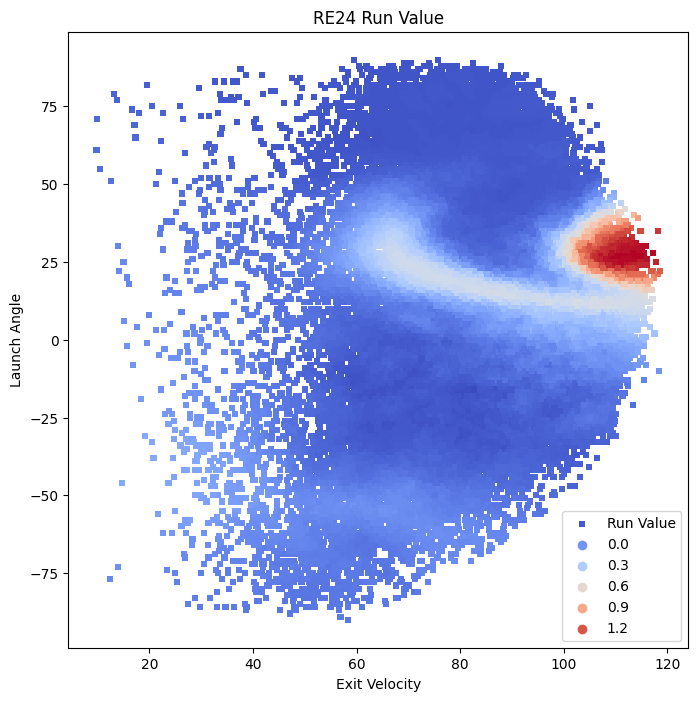

In [112]:
import matplotlib.lines as mlines
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
sns.scatterplot(data=df3, x='launch_speed', y='launch_angle', marker='s', s=20, hue=y_pred, edgecolor='none', palette='coolwarm', label="Run Value", legend=True)
plt.xlabel('Exit Velocity')
plt.ylabel('Launch Angle')
plt.title("""RE24 Run Value""")

plt.show()

In [113]:
df3['pred_run_value'] = y_pred

C:\Users\wampl\AppData\Local\Temp\ipykernel_8136\272548112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pred_run_value'] = y_pred


In [114]:
df3.groupby('player_name')['pred_run_value'].sum().sort_values(ascending=True).head(10)

player_name
Rogers, Tyler      -9.16835
Suter, Brent       -5.38965
Poche, Colin       -4.83985
Hader, Josh        -4.45400
Jax, Griffin       -3.58885
Cosgrove, Tom      -3.25135
Lawrence, Justin   -3.21375
Ottavino, Adam     -3.18230
Koch, Matt         -3.06825
Pallante, Andre    -2.93260
Name: pred_run_value, dtype: float64

In [115]:
df3['pitch_team'] = np.where(df3['inning_topbot'] == 'Top', df3['home_team'], df3['away_team'])

C:\Users\wampl\AppData\Local\Temp\ipykernel_8136\2239673255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pitch_team'] = np.where(df3['inning_topbot'] == 'Top', df3['home_team'], df3['away_team'])


In [116]:
df3.loc[df3['events']=='walk', 'pred_run_value'] = 0.31
df3.loc[df3['events']=='strikeout', 'pred_run_value'] = -0.29

In [117]:
df3.loc[df3['events']=='strikeout']

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,runs_scored_play,runner_1b,runner_2b,runner_3b,runners,half_inning,bat_score_min,runs_scored_inning_total,runs_scored_rest_of_inning,re24,re24_change,re24_weight,pred_run_value,pitch_team


In [118]:
df3.groupby('pitch_team')['pred_run_value'].sum().sort_values(ascending=True).head(10)

pitch_team
SD     67.31110
PHI    74.04125
MIN    86.75775
SF     89.56315
TB     90.69185
TEX    91.23595
CHC    94.75745
NYM    95.15165
LAD    96.57280
BOS    97.37325
Name: pred_run_value, dtype: float64

In [121]:
df3.groupby('batter')['pred_run_value'].sum().sort_values(ascending=False).head(10)

batter
660271    52.80470
518692    46.37900
660670    41.71735
621566    38.28050
502110    36.64895
592450    35.46810
673962    34.15775
666182    34.10535
608369    32.75865
666969    32.16260
Name: pred_run_value, dtype: float64

In [119]:
help(df3.where)

Help on method where in module pandas.core.frame:

where(cond, other=<no_default>, *, inplace: 'bool' = False, axis: 'Axis | None' = None, level: 'Level' = None, errors: 'IgnoreRaise | lib.NoDefault' = 'raise', try_cast: 'bool | lib.NoDefault' = <no_default>) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Replace values where the condition is False.
    
    Parameters
    ----------
    cond : bool Series/DataFrame, array-like, or callable
        Where `cond` is True, keep the original value. Where
        False, replace with corresponding value from `other`.
        If `cond` is callable, it is computed on the Series/DataFrame and
        should return boolean Series/DataFrame or array. The callable must
        not change input Series/DataFrame (though pandas doesn't check it).
    other : scalar, Series/DataFrame, or callable
        Entries where `cond` is False are replaced with
        corresponding value from `other`.
        If other is callable, it 

In [124]:
df2['pred_run_value'] = df3['pred_run_value']
df2.loc[df2['events']=='walk', 'pred_run_value'] = 0.31
df2.loc[df2['events']=='strikeout', 'pred_run_value'] = -0.29

In [125]:
df2['pitch_team'] = np.where(df2['inning_topbot'] == 'Top', df2['home_team'], df2['away_team'])

In [128]:
df2.groupby('pitch_team')['pred_run_value'].sum().sort_values(ascending=True).head(10)

pitch_team
MIN   -130.32225
PHI   -109.74875
SEA   -105.05535
SD    -102.07890
MIA   -101.08845
SF    -100.28685
TB     -99.35815
BOS    -82.34675
ATL    -80.82230
TOR    -74.63020
Name: pred_run_value, dtype: float64

In [129]:
df2['bat_team'] = np.where(df2['inning_topbot'] == 'Top', df2['away_team'], df2['home_team'])

In [132]:
df2.groupby('bat_team')['pred_run_value'].sum().sort_values(ascending=False).head(30)

bat_team
ATL     73.79860
LAD     34.48695
TEX     20.92320
STL     -1.85975
TOR    -19.16290
LAA    -20.95690
SD     -26.43980
NYM    -29.17430
HOU    -32.83035
NYY    -34.53520
BOS    -42.07660
BAL    -49.45255
SF     -57.38610
CHC    -57.38780
MIN    -61.40580
TB     -63.48020
SEA    -66.72920
MIA    -70.23425
KC     -72.69090
CLE    -74.11325
PIT    -79.38505
DET    -80.91190
AZ     -83.35315
MIL    -84.42395
PHI    -84.53040
CIN    -95.18160
COL    -97.34470
WSH   -104.38080
CWS   -125.79915
OAK   -146.75330
Name: pred_run_value, dtype: float64

In [136]:
df2.groupby('player_name')['pred_run_value'].sum().sort_values(ascending=True).head(60)

player_name
Strider, Spencer     -27.04735
López, Pablo         -26.81280
Eflin, Zach          -25.14410
Wheeler, Zack        -24.69770
Burnes, Corbin       -24.02895
Webb, Logan          -22.82105
Musgrove, Joe        -22.68125
Ryan, Joe            -22.54610
Bautista, Félix      -22.48240
Steele, Justin       -20.37585
Cole, Gerrit         -18.49155
Luzardo, Jesús       -18.40140
Rogers, Tyler        -18.18835
Eovaldi, Nathan      -18.18025
Ohtani, Shohei       -18.03085
Gausman, Kevin       -17.87285
Scott, Tanner        -16.25505
Sewald, Paul         -16.05680
Castillo, Luis       -15.93480
Hader, Josh          -15.92400
Verlander, Justin    -15.65175
Scherzer, Max        -15.58060
Valdez, Framber      -15.55900
Gilbert, Logan       -15.44765
Nola, Aaron          -15.17675
Rodriguez, Eduardo   -15.15780
Senga, Kodai         -15.08185
Keller, Mitch        -14.95710
Doval, Camilo        -14.83795
Kershaw, Clayton     -14.64155
Darvish, Yu          -14.63065
Chapman, Aroldis     -14.44